https://www.kaggle.com/philculliton/nlp-getting-started-tutorial

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [64]:
from sklearn.model_selection import train_test_split
from plot_cm import plot_cm
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")


In [65]:
neg_values = train_df[train_df["target"] == 0]["text"].values
pos_values = train_df[train_df["target"] == 1]["text"].values

In [66]:
count_vectorizer = feature_extraction.text.CountVectorizer()
## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [67]:
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [68]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

In [69]:
train_df, valid_df = train_test_split(train_df, test_size=0.2, stratify=train_df['target'])
valid_vectors = count_vectorizer.transform(valid_df["text"])
train_vectors = count_vectorizer.transform(train_df['text'])

In [70]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [71]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.72111313, 0.74355828, 0.73292683])

In [72]:
clf.fit(train_vectors, train_df["target"])


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

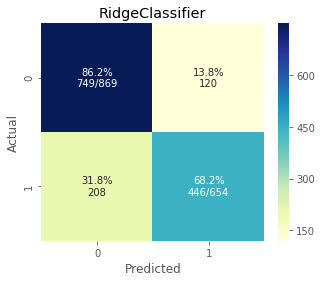

In [73]:
valid_df["target_pred"] = clf.predict(valid_vectors)
plot_cm(valid_df['target'], valid_df['target_pred'], 'RidgeClassifier')

In [ ]:
sample_submission = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample_submission["target"] = clf.predict(test_vectors)

In [ ]:
sample_submission.head()

In [ ]:
sample_submission.to_csv("submissions/01_classic_text_classification_submission.csv", index=False)

Score: 0.77096

TODO:
  - Different classification models/ensembles (random forest, gradient boosting), stacking/voting
  - Hyperparameters optimization
